In [124]:
# data processing
import pandas as pd

# linear algebra
import numpy as np 

#matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.pyplot as pt
%matplotlib inline


# data visualization
import seaborn as sns


# Algorithms
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Lasso,ElasticNet,BayesianRidge, LassoLarsIC
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
#import xgboost as xgb
from scipy import stats
#import lightgbm as lgb

In [125]:
#Importing Data

test_df = pd.read_csv("F:/Practice Data/House Price/test.csv")
train_df = pd.read_csv("F:/Practice Data/House Price/train.csv")


In [126]:
#save the ID column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Drop the ID column since it is unnecessary for the prediction process
train_df.drop("Id",axis =1,inplace = True)
test_df.drop("Id",axis =1,inplace= True)

In [127]:
print ("Train data: \n")
print ("Number of columns: " + str (train_df.shape[1]))
print ("number of rows: " + str (train_df.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test_df.shape[1]))
print ("Number of columns:" +  str (test_df.shape[0]))

Train data: 

Number of columns: 80
number of rows: 1460

Test data: 

number of columns:79
Number of columns:1459


In [84]:
#Data Exploration/Analysis
train_df.info()

#Describe
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
#Data Header 
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


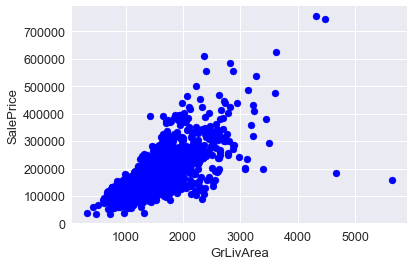

In [128]:
#ScatterPlot for GrLivArea Outliers
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], color = 'blue')
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 200000)].index, axis = 0, inplace = True)


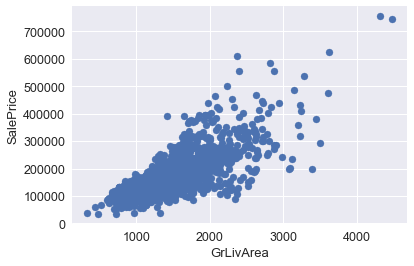

In [87]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train_df['GrLivArea'], train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

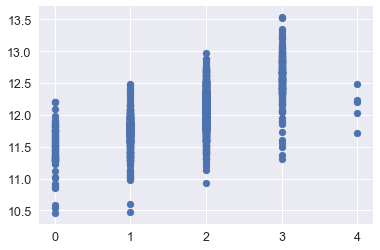

In [33]:
#GarageCars
plt.scatter(x=train_df["GarageCars"], y =np.log(train_df.SalePrice))
plt.show()

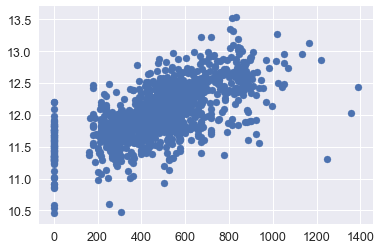

In [34]:
#GarageArea
plt.scatter(x=train_df["GarageArea"], y =np.log(train_df.SalePrice))
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   P

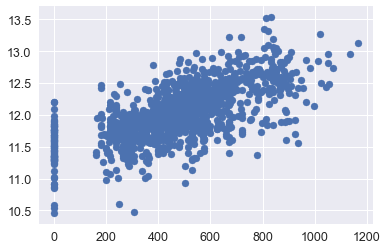

In [129]:
#Elimintate Outliers in GarageArea
train_df = train_df[train_df.GarageArea <1200]
print (train_df)
plt.scatter(x=train_df.GarageArea,y=np.log(train_df.SalePrice))
plt.show()

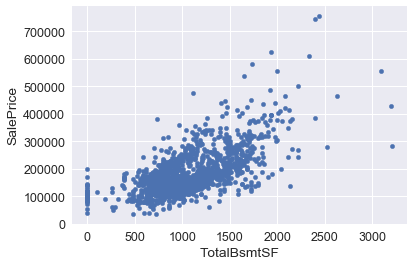

In [130]:
#TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'],train_df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000);
plt.show()

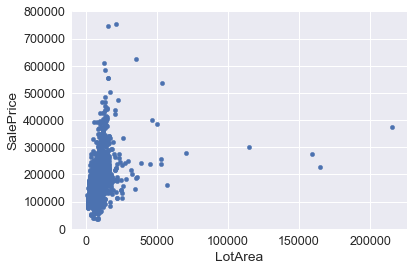

In [38]:
#scatter plot LotArea/salePrice
var = 'LotArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000));
plt.show();

###### Categorical variables

             SalePrice
OverallQual           
1                50150
2                60000
3                87500
4               108000
5               133000
6               160000
7               200141
8               270000
9               345000
10              451950


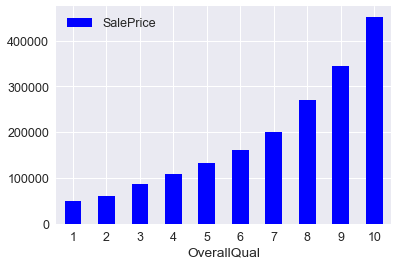

In [131]:
#OverallQual Variables 
train_df.OverallQual.unique()
quality_pivot=train_df.pivot_table(index="OverallQual",values="SalePrice",aggfunc=np.median)
print (quality_pivot)
quality_pivot.plot(kind="bar",color="blue")
plt.xticks(rotation=0)
plt.show()

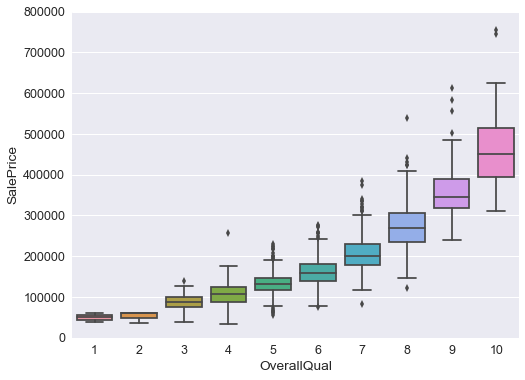

In [40]:
#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show();

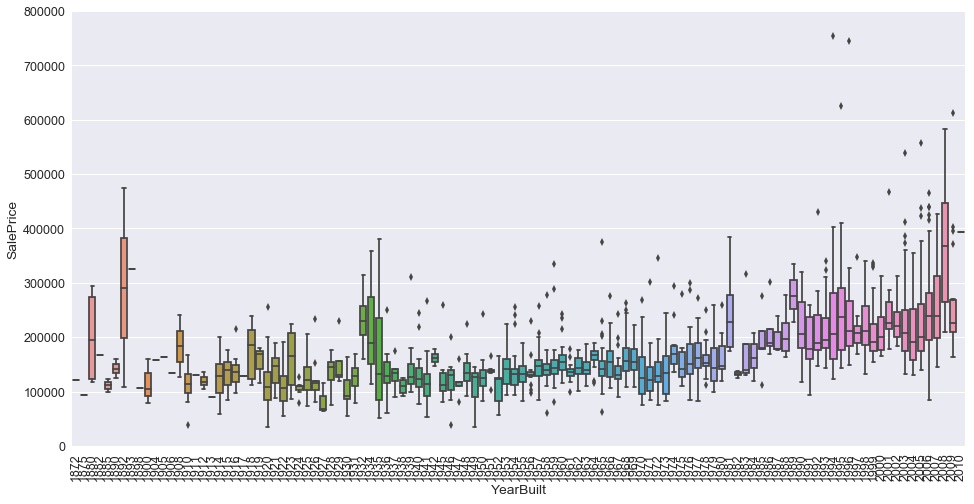

In [41]:
#year built
var  = 'YearBuilt'
data= pd.concat([train_df['SalePrice'], train_df[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();


###### Check Normalization on SalesPrice Variable (Skewness)


 mu = 180820.43 and sigma = 79330.10



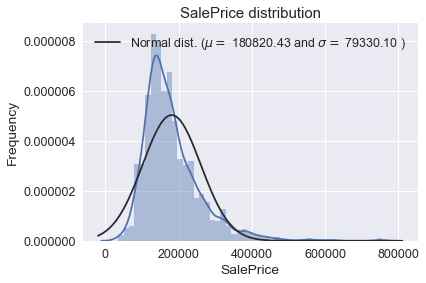

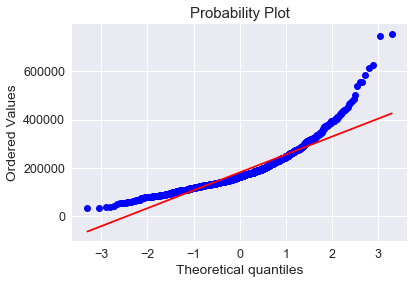

In [42]:
#Check Normalization on SalesPrice Variable

sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

###### Taking Log on SalePrice
we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data


 mu = 12.02 and sigma = 0.40



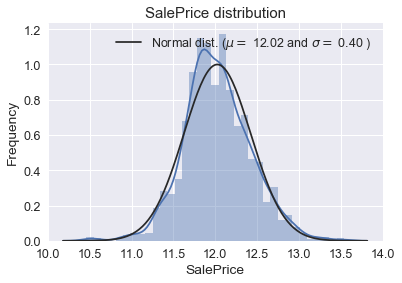

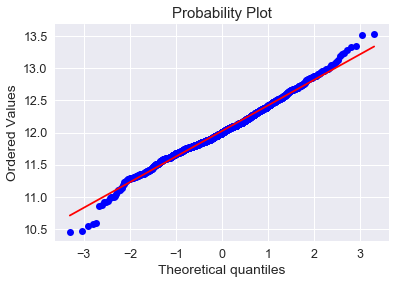

In [132]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [133]:
#concatenate the train and test data in the same dataframe

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2913, 79)


19

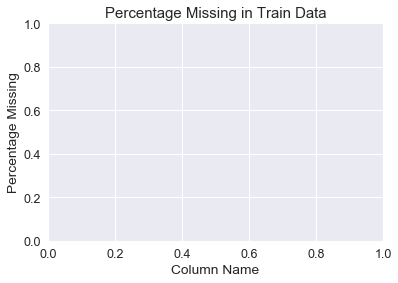

In [135]:
#Missing Data in Train
missing_train = train_df.isnull().sum()/len(train_df.index)*100
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")
len(missing_train)

Text(0.5,1,'Percentage Missing in Train Data')

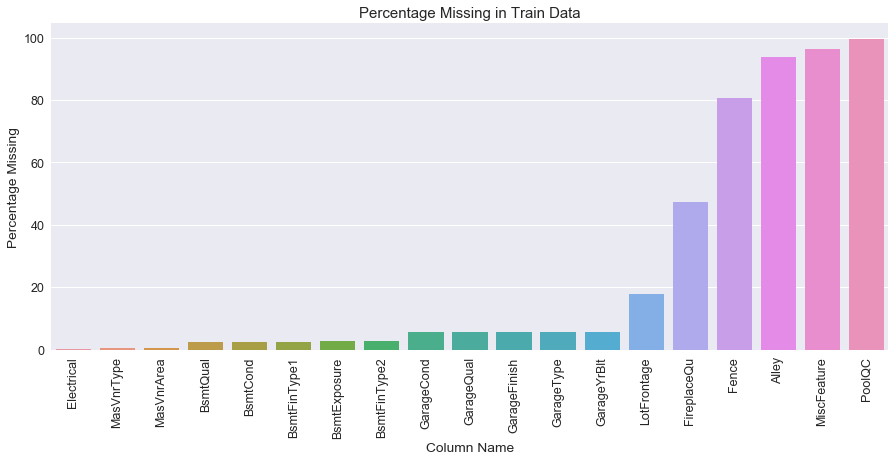

In [136]:
#Missing Data in Train
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_train.index, y =missing_train)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Train Data")

33

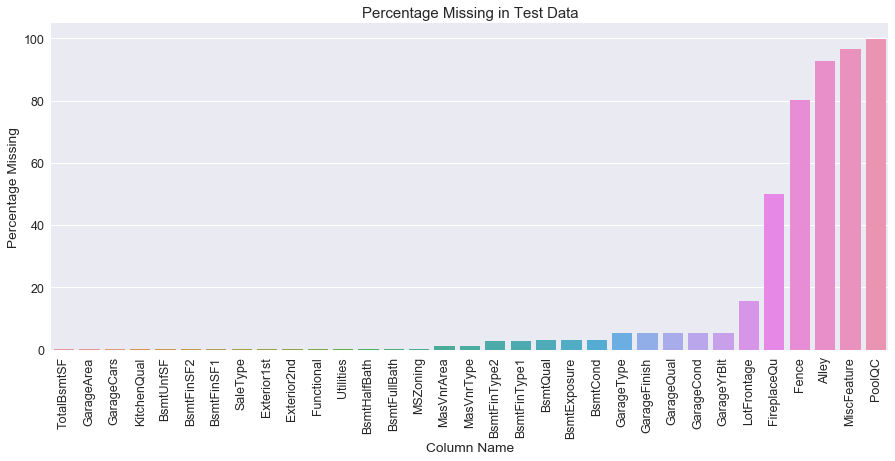

In [49]:
#Missing Data in Test
missing_test = test_df.isnull().sum()/len(test_df.index)*100
missing_test = missing_test[missing_test >0]
missing_test.sort_values(inplace=True)

f, ax = plt.subplots(figsize= (15,6))
plt.xticks(rotation='90')
sns.barplot(x= missing_test.index, y = missing_test)
plt.xlabel("Column Name")
plt.ylabel("Percentage Missing")
plt.title("Percentage Missing in Test Data")

len(missing_test)


Text(0.5,1,'Percent missing data by feature')

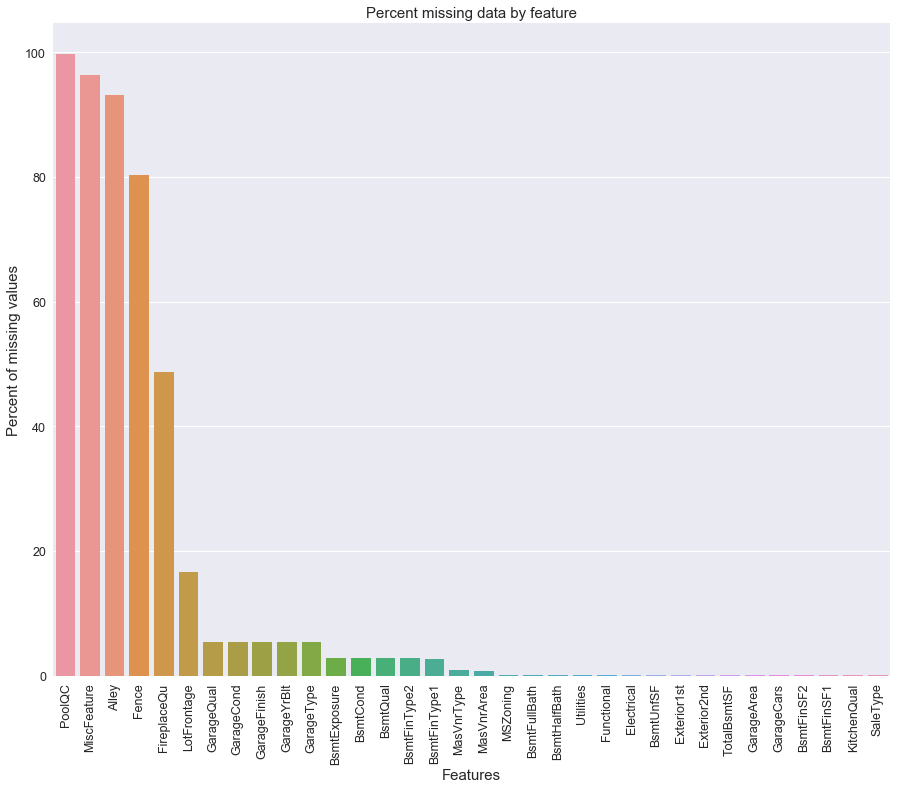

In [137]:
#Missing Data Ration in Both Data Set 

all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(20)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.72
GarageCars       0.69
GarageArea       0.67
TotalBsmtSF      0.65
1stFlrSF         0.62
FullBath         0.60
YearBuilt        0.59
YearRemodAdd     0.56
GarageYrBlt      0.54
TotRmsAbvGrd     0.54
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.39
LotFrontage      0.37
WoodDeckSF       0.33
OpenPorchSF      0.33
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.06
BsmtFinSF2       0.01
BsmtHalfBath    -0.00
MiscVal         -0.02
OverallCond     -0.04
LowQualFinSF    -0.04
YrSold          -0.04
MSSubClass      -0.07
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64


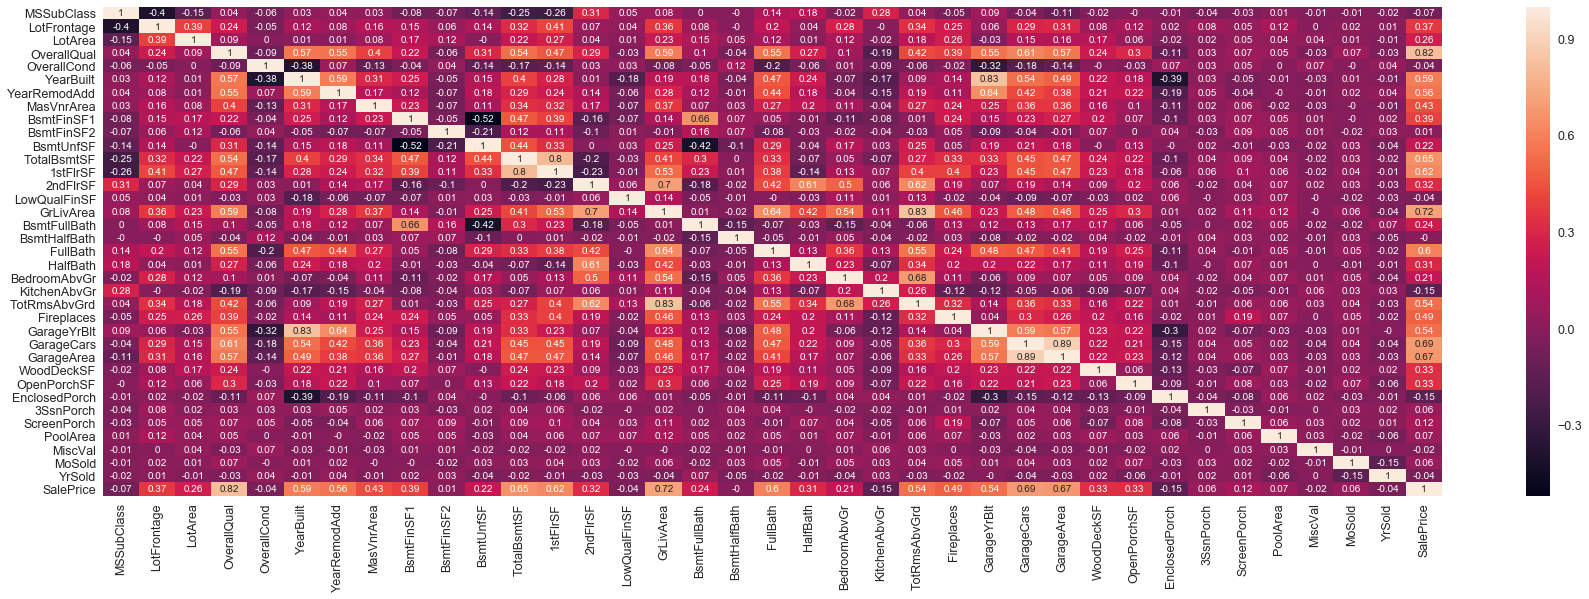

In [138]:
#Correlation Matrix to measure linear relationship with variable 
correlation_matrix = train_df.corr().round(2)
# annot = True to print the values inside the square
print(correlation_matrix['SalePrice'].sort_values(ascending =False))
f,ax = plt.subplots(figsize= (30,9))
sns.heatmap(data=correlation_matrix, annot=True)

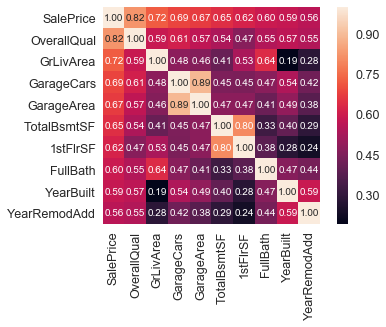

In [139]:
#Top 10 Variables
cols = correlation_matrix.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale= 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt ='.2f', annot_kws={'size': 10}, yticklabels = cols.values,
                xticklabels = cols.values)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

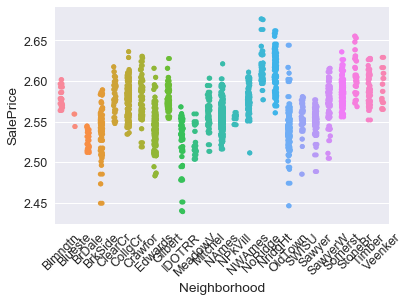

In [54]:
sns.stripplot(x= train_df.Neighborhood, y = train_df.SalePrice, 
              order = np.sort(train_df.Neighborhood.unique()),
              jitter = True, alpha= 1)
sns.stripplot(x= train_df.Neighborhood, y = train_df.SalePrice, 
              order = np.sort(train_df.Neighborhood.unique()),
              jitter = 0.1)
plt.xticks(rotation=45)

In [140]:
#Convert NA into None
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [141]:
#Convert NAN into 0 
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [142]:
#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [143]:
#msZoning classification: 'RL' is common
all_data ['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#functional: NA is typical
all_data["Functional"] = all_data["Functional"].fillna('Typ')

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual
all_data['KitchenQual'] =all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
all_data ['Exterior1st']= all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']= all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#sale type
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [144]:
#dropping as same value 'AllPub' for all records except 2NA and 1 'NoSeWa'
all_data = all_data.drop(['Utilities'], axis=1)

In [145]:
#check if any missing value present
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


In [146]:
#Transforming required numerical features to categorical 
all_data['MSSubClass']= all_data['MSSubClass'].apply(str)
all_data['OverallCond'] =all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [147]:
#Label Encoding some categorical variables
#for information in their ordering set

from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
#shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2913, 78)


In [148]:
#add total surface area as TotalSf = basement + firstflr + secondflr
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [149]:
#log transform skewed numeric features 

numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)

\skew in numerical features: 



,Skew
MiscVal,21.934376
PoolArea,17.676417
LotArea,13.162340
LowQualFinSF,12.076090
3SsnPorch,11.364106
LandSlope,4.991687
KitchenAbvGr,4.297140


In [150]:
#Box cox transformation of highly skewed features
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
           

There are 59 skewed numerical features to box cox transform


In [151]:
#Dummy Categorical

all_data = pd.get_dummies(all_data)
print(all_data.shape)


train_df = pd.DataFrame(all_data[:ntrain])
test_df = pd.DataFrame(all_data[ntrain:])


(2913, 220)


In [153]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [154]:
#Base Modelling 

#Lasso Regressino 
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

In [155]:
#Gradient Boosting Regression :
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')

In [156]:
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [157]:
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [119]:
#XGBoost 
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

NameError: name 'xgb' is not defined

In [ ]:
#LightGBM

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [158]:
#Lasso Regression 

score = rmsle_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.1113 (0.0074)



In [160]:
#Gradient Boosting Regression

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1167 (0.0085)

ElasticNet score: 0.1113 (0.0074)

Kernel Ridge score: 0.1150 (0.0074)



In [ ]:
#ElasticNet Regression
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
#Kernel Ridge
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [162]:
#Stacking Models

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [163]:
#Average base model score 
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1084 (0.0075)



In [164]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [165]:
averaged_models.fit(train_df.values, y_train) 
stacked_train_pred = averaged_models.predict(train_df.values)
stacked_pred = np.expm1(averaged_models.predict(test_df.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train_df.values, y_train)

RMSLE score on the train data:
0.0796044414796
Accuracy score:


0.96018039020237078

In [166]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['id'] = test_ID
submit['SalePrice'] = ensemble
submit.to_csv('F:/Practice Data/House Price/Final3.csv',encoding='utf-8', index = False)
submit.head()                                


,id,SalePrice
0,1461,120758.848229
1,1462,162083.070863
2,1463,185137.890416
3,1464,194954.145694
4,1465,191906.549860
